# Climate forecast

__English__

Climate change is known to everyone today, over the years we have witnessed these variations by ourselves. But, how much truth do they have? Are they really dealing with many specific situations or do they attend to a trend? What will the weather be like in the future?

If you are skeptical, following this step-by-step analysis like in this notebook can lead you to change your mind or clarify your doubts. The purpose is, from historical temperature and rainfall data, analyze possible trends, compare the same periods between well-differentiated time ranges, and estimate what the future values will be.

The example is based on data from my homecity Vigo (Spain), with a process that can be extrapolated to any other.

__Español__

El cambio climático está en boca de todos, y en mayor o menor medida, a lo largo de los años nosotros mismos hemos sido testigos de estas variaciones. Pero, ¿cuánto tienen de cierto? ¿Realmente se tratan de muchas situaciones puntuales o atienden a una tendencia? ¿Cómo será el clima en el futuro? 

Si eres de los escépticos, seguir un análisis paso a paso como en este cuaderno puede llevarte a cambiar de idea o clarificar tus dudas. El propósito es, a partir de los datos históricos de temperatura y lluvia, analizar las posibles tendencias, comparar los mismos periodos entre rangos de tiempo bien diferenciados y estimar cuáles serán los valores futuros.

El ejemplo se basa en los datos de la ciudad de Vigo (España), con un proceso completamente extrapolable a cualquier otra.

__Content__

1. Preparation

    1.1 Data import
    
    1.2 Data wrangling
    
    
    
2. Data analysis

    2.1 Maximum temperatures
    
    2.2 Minimum temperatures
    
    2.3 Rainfalls
    
    2.4 1962 vs 2019: The first vs the last
    
    2.5 Winter: 1960's vs 2010's
    
    2.6 Spring: 1960's vs 2010's
    
    2.7 Summer: 1960's vs 2010's
    
    2.8 Autumn: 1960's vs 2010's
    
    2.9 Rainfalls: 1960's vs 2010's
    

3. Predictions

    3.1 Maximum temperatures
    
    3.2 Minimum temperatures
    
    3.3 Rainfalls
    
    

4. Conclusions

# 1. Preparation

In [108]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from sklearn import linear_model

## 1.1 Data import

Let's read our data file with Vigo's weather information

In [109]:
meteo = pd.read_csv('meteo.csv')
meteo.head()

,FECHA,T. Máxima,T.Mínima,Precipitación: l/m2,Horas Sol:
0,01/01/1961,7.2,1.0,10.6,NaN
1,02/01/1961,12.6,5.0,72.8,NaN
2,03/01/1961,10.0,7.4,6.0,NaN
3,04/01/1961,10.2,5.0,2.0,NaN
4,05/01/1961,9.4,2.4,Ip,NaN


The data file was read in a dataframe, but as the previous table shows, there are NaN values.

We should do some data correction in our meteo dataframe. The first step will be rename columns

In [110]:
meteo.columns = ['Date','Tmax','Tmin','Rain','Sunhours']
meteo.head()

,Date,Tmax,Tmin,Rain,Sunhours
0,01/01/1961,7.2,1.0,10.6,NaN
1,02/01/1961,12.6,5.0,72.8,NaN
2,03/01/1961,10.0,7.4,6.0,NaN
3,04/01/1961,10.2,5.0,2.0,NaN
4,05/01/1961,9.4,2.4,Ip,NaN


## 1.2 Data wrangling

Let's count how many NaN values are in each column

In [111]:
print('Tmax: {}'.format(meteo['Tmax'].isna().sum()))
print('Tmin: {}'.format(meteo['Tmin'].isna().sum()))
print('Rain: {}'.format(meteo['Rain'].isna().sum()))
print('Sunhours: {}'.format(meteo['Sunhours'].isna().sum()))

Tmax: 56
Tmin: 43
Rain: 4
Sunhours: 7275


We should make some decision with the NaN values. We cannot be present in our data frame.

Since the fundamentals for our analysis are, in this order, the temperatures, rain and hours of sunlight, we proceed as follows:

- If any temperature data is missing, the day is deleted. The impact will be low, since we will always work with longer periods (months, years, etc.)

- If any rain data is missing, it is replaced by zero.

- If any data on hours of sunshine is missing, the NaN will not be changed. They will have to be filtered when doing operations.

So, let's do it!

In [112]:
# Delete days with NaN in Tmax and Tmin
meteo = meteo[meteo['Tmax'].notna()]
meteo = meteo[meteo['Tmin'].notna()]
# Replace NaN values by zero in Rain column
meteo['Rain'].fillna(0, inplace=True)

In another check step, we will print all unique values of each column, doing a visual inspection

In [113]:
meteo['Tmax'].unique()

array([ 7.2, 12.6, 10. , 10.2,  9.4,  9.2, 11.6, 10.8,  9.6, 13. ,  9. ,
       12.2,  8.2,  8.4, 10.4, 10.6, 11.4, 12. , 11.2, 13.4, 12.4, 13.2,
       17. , 11. , 18. , 19.2, 17.4, 16. , 16.4, 17.2, 15.6, 19. , 14. ,
       15.4, 16.6, 12.8, 17.6, 19.8, 22. , 22.2, 21. , 19.4, 20. , 22.8,
       18.2, 21.4, 22.4, 21.6,  9.8, 15.8, 17.8, 20.6, 21.2, 15.2, 14.2,
       13.8, 14.6, 14.8, 13.6, 16.2, 16.8, 15. , 26.4, 30. , 29.4, 29.2,
       29. , 27. , 30.2, 23. , 18.4, 20.4, 19.6, 23.4, 23.6, 26.2, 31.6,
       32.2, 29.8, 26. , 28.2, 30.6, 24. , 25.2, 27.6, 27.4, 29.6, 28.4,
       23.2, 25. , 24.4, 25.6, 33.6, 25.4, 21.8, 28.6, 28. , 24.2, 30.4,
       24.6, 31. , 27.8, 33.2, 36. , 22.6, 26.8, 20.8, 14.4, 11.8,  6. ,
        8. , 18.8, 18.6, 24.8, 27.2, 33. , 20.2, 31.4, 33.4, 23.8, 26.6,
        8.6,  5.4,  6.4,  7.4,  5.6,  0. ,  4.4,  6.8, 32.8,  7.6,  8.8,
        7. , 35.2, 34.6, 32. , 25.8, 31.2, 32.6,  4.6,  6.2,  4. ,  6.6,
       32.4,  7.8, 34. , 10.5, 28.8, 17.5, 18.5, 28

In [114]:
meteo['Tmin'].unique()

array([ 1. ,  5. ,  7.4,  2.4,  2. ,  8. ,  8.6,  5.2,  6.6,  4.2,  1.6,
       -0.6,  0. , -0.4,  1.2,  4.4,  5.4,  2.6,  4. ,  7.2,  7.6,  5.6,
        4.6,  7. , 10.2,  6. ,  8.4,  4.8,  6.8,  9.2,  9. ,  6.2, 11.2,
        9.6, 11.6, 11.8,  9.4,  5.8, 12. ,  7.8, 11. ,  8.2, 10. , 10.4,
       12.4, 13.6, 14. , 16.6, 13.4, 15.2, 11.4, 13. ,  8.8, 10.6,  9.8,
       16.4, 16.2, 15.4, 18.8, 17.6, 15. , 15.8, 14.4, 16. , 14.8, 17. ,
       18.4, 12.8, 14.6, 17.8, 14.2, 12.6, 12.2, 22.4, 19.4, 13.8, 18.2,
       17.4, 13.2,  6.4, 10.8,  0.6,  3.6,  2.8,  3.2,  3. ,  3.4,  1.8,
        0.4, 15.6, 21. , 13.5, 17.2,  1.4,  3.8, -0.2, -1.4, -2.4, -2. ,
       -1.6, -5. , -1. , 18. ,  2.2,  0.8, 19.2, 20. , 19.8, 18.6, 23. ,
       19. ,  0.2, 20.6, 20.4, 19.6, 16.8, 10.9, 14.5,  9.5, 21.4, 10.5,
        4.5,  5.3,  3.5, -2.6, -3. , -3.4, -4. ,  2.5,  0.5, 12.3, -0.8,
        4.3, -1.8,  4.1, 12.7, 13.3, -1.2, 22. , -2.8, 13.7, -3.6, 20.2,
       21.2, 20.8, 22.6,  1.5, 16.9, 15.1,  3.1, 10

In [115]:
meteo['Rain'].unique()

array(['10.6', '72.8', '6.0', '2.0', 'Ip', '21.4', '33.6', '0.0', '8.0',
       '8.4', '6.7', '1.8', '13.2', '22.3', '21.0', '12.4', '18.5',
       '10.7', '0.3', '32.0', '1.0', '8.3', '61.6', '46.2', '5.6', '4.0',
       '5.4', '0.4', '5.0', '25.8', '61.4', '59.8', '23.4', '3.0', '5.2',
       '10.4', '49.8', '16.4', '38.0', '1.6', '3.6', '5.8', '16.8',
       '27.0', '19.8', '9.6', '18.4', '12.6', '39.2', '71.6', '31.3',
       '7.8', '5.9', '23.0', '3.2', '3.3', '1.3', '0.7', '14.2', '51.1',
       '42.4', '4.2', '0.9', '7.4', '1.4', '19.2', '12.2', '48.2', '14.0',
       '0.8', '34.1', '10.2', '1.2', '2.4', '20.4', '15.0', '10.0',
       '11.4', '49.6', '36.2', '86.8', '31.2', '40.0', '31.6', '9.1',
       '27.4', '13.0', '20.2', '0.6', '4.6', '23.2', '6.6', '9.0', '28.6',
       '18.6', '20.8', '21.9', '17.0', '2.2', '9.2', '22.0', '51.7',
       '36.6', '13.3', '53.6', '17.6', '32.6', '7.0', '12.1', '4.8',
       '39.4', '32.2', '3.8', '67.2', '27.1', '11.2', '131.4', '137.4',
  

In [116]:
meteo['Sunhours'].unique()

array([ nan,  5. ,  0. ,  6. ,  9.5,  2.3,  1. ,  3.2,  1.8,  1.6,  2.5,
        4.1,  1.4,  0.3,  2. ,  4.2,  9.3,  9.6,  9.8, 10. ,  6.3,  7.4,
        6.9,  0.5,  6.5,  0.8,  8.5,  3.8,  6.8,  3.3,  5.9,  5.2,  2.4,
        4.5,  2.8,  3.9, 10.3, 10.9,  5.6,  9.1,  7.7, 11.3, 12.2, 12.3,
        8.3,  1.3,  8.6, 11.8, 12. , 11.2,  0.9, 12.5,  0.1, 10.8, 10.5,
        7. ,  0.4, 13. ,  5.8,  8. ,  8.9, 10.2,  3.4, 13.1,  3. ,  1.1,
        8.7, 11. , 10.6,  5.1,  9. ,  6.4,  7.5,  2.9,  1.5, 12.1, 12.6,
       13.2, 12.9, 11.7,  6.6,  4.3,  6.7,  0.7,  4.7, 12.8,  7.1, 11.5,
       12.4, 12.7,  4.8,  8.2,  9.7, 10.4,  5.5,  5.4,  4.9,  5.3,  9.2,
       10.1, 10.7,  1.2,  1.9,  7.3,  5.7,  8.8,  8.4,  6.2,  4.4,  3.6,
        3.5,  8.1,  0.2,  4. ,  3.1,  2.6,  7.6,  0.6,  2.7,  1.7,  7.9,
        3.7,  9.4,  7.8, 11.4,  7.2, 13.7,  2.2,  2.1, 13.3, 13.6, 13.4,
       11.6, 11.1,  6.1, 11.9, 13.5,  4.6, 14. , 14.2, 14.6, 14.4, 14.5,
       14.3, 13.8,  9.9, 14.1, 13.9])

All right. Regardless of NaN already accepted at Sunhours, we have another unaccepted value. The Rain column has 'lp' values. As happened with the NaN, we will proceed to change them to zero

In [117]:
print('We have a total of {} lp values'.format(meteo['Rain'].loc[meteo['Rain'] == 'Ip'].count()))
meteo['Rain'].replace(to_replace='Ip', value='0', inplace=True)
print('After change them, we have {} values'.format(meteo['Rain'].loc[meteo['Rain'] == 'Ip'].count()))

We have a total of 554 lp values
After change them, we have 0 values


We have not yet checked the data type of each column. Some values appear with quotes, so this makes us think that something is not right

In [118]:
meteo.dtypes

Date         object
Tmax        float64
Tmin        float64
Rain         object
Sunhours    float64
dtype: object

Yes, Rain and Sunhours columns should be float too

In [119]:
meteo = meteo.astype({'Rain':float, 'Sunhours':float})
meteo.dtypes

Date         object
Tmax        float64
Tmin        float64
Rain        float64
Sunhours    float64
dtype: object

We can summarize data to another visual inspection

In [120]:
meteo.describe()

,Tmax,Tmin,Rain,Sunhours
count,21492.000000,21492.000000,21492.000000,14246.000000
mean,18.003666,9.688982,5.004085,6.170174
std,5.889306,4.380569,11.324318,4.505572
min,0.000000,-5.000000,0.000000,0.000000
25%,13.200000,6.400000,0.000000,1.600000
50%,17.200000,10.000000,0.000000,6.500000
75%,22.000000,13.000000,4.400000,9.900000
max,40.800000,25.500000,175.000000,14.600000


The historical minimum value of Tmax is zero. Let's check if it's an error or a true value:

In [121]:
meteo[meteo['Tmax'] == 0]

,Date,Tmax,Tmin,Rain,Sunhours
762,02/02/1963,0.0,-2.0,11.2,NaN


It seems fine. What a cold day!!

For a easier handling, we can include columns with the month and year of the date

In [122]:
meteo['Day'] = pd.DatetimeIndex(data=meteo['Date'], dayfirst=True).day
meteo['Month'] = pd.DatetimeIndex(data=meteo['Date'], dayfirst=True).month
meteo['Year'] = pd.DatetimeIndex(data=meteo['Date'], dayfirst=True).year
meteo.head()

,Date,Tmax,Tmin,Rain,Sunhours,Day,Month,Year
0,01/01/1961,7.2,1.0,10.6,NaN,1,1,1961
1,02/01/1961,12.6,5.0,72.8,NaN,2,1,1961
2,03/01/1961,10.0,7.4,6.0,NaN,3,1,1961
3,04/01/1961,10.2,5.0,2.0,NaN,4,1,1961
4,05/01/1961,9.4,2.4,0.0,NaN,5,1,1961


Calculate the season to a new column is another good option 

In [123]:
meteo.loc[(meteo['Month'] < 3) | ((meteo['Month'] == 3) & (meteo['Day'] < 20)), 'Season'] = 'Winter'
meteo.loc[(meteo['Month'] == 3) & (meteo['Day'] >= 20), 'Season'] = 'Spring'
meteo.loc[(meteo['Month'] == 4) | (meteo['Month'] == 5), 'Season'] = 'Spring'
meteo.loc[(meteo['Month'] == 6) & (meteo['Day'] < 20), 'Season'] = 'Spring'
meteo.loc[(meteo['Month'] == 6) & (meteo['Day'] >= 20), 'Season'] = 'Summer'
meteo.loc[(meteo['Month'] == 7) | (meteo['Month'] == 8), 'Season'] = 'Summer'
meteo.loc[(meteo['Month'] == 9) & (meteo['Day'] < 22), 'Season'] = 'Summer'
meteo.loc[(meteo['Month'] == 9) & (meteo['Day'] >= 22), 'Season'] = 'Autumn'
meteo.loc[(meteo['Month'] == 10) | (meteo['Month'] == 11), 'Season'] = 'Autumn'
meteo.loc[(meteo['Month'] == 12) & (meteo['Day'] < 21), 'Season'] = 'Autumn'
meteo.loc[(meteo['Month'] == 12) & (meteo['Day'] >= 21), 'Season'] = 'Winter'
meteo.tail(15)

,Date,Tmax,Tmin,Rain,Sunhours,Day,Month,Year,Season
21534,17/12/2019,8.9,3.3,3.6,4.9,17,12,2019,Autumn
21535,18/12/2019,14.8,7.9,72.8,0.0,18,12,2019,Autumn
21536,19/12/2019,14.1,8.4,27.8,0.0,19,12,2019,Autumn
21537,20/12/2019,11.8,8.2,22.7,0.0,20,12,2019,Autumn
21538,21/12/2019,15.1,10.5,25.5,NaN,21,12,2019,Winter
21539,22/12/2019,14.3,8.6,12.2,1.8,22,12,2019,Winter
21540,23/12/2019,13.5,8.2,5.5,0.0,23,12,2019,Winter
21541,24/12/2019,17.5,11.3,0.1,6.5,24,12,2019,Winter
21542,25/12/2019,19.4,10.7,2.9,5.2,25,12,2019,Winter
21543,26/12/2019,13.3,5.3,0.0,5.0,26,12,2019,Winter


Finally, we can check the type of each column for the last time

In [124]:
meteo.dtypes

Date         object
Tmax        float64
Tmin        float64
Rain        float64
Sunhours    float64
Day           int64
Month         int64
Year          int64
Season       object
dtype: object

# 2. Data analysis

## 2.1 Maximum temperatures

Let's take a look to the maximum temperatures of each year. Using meteo dataframe, we will calculate the mean value for each year

In [125]:
df_tmax = meteo.groupby(['Year'])[['Tmax']].mean()
df_tmax.index = map(int, df_tmax.index)
df_tmax.reset_index(inplace = True)
df_tmax.columns = ['Year', 'Tmax']
df_tmax.head()

,Year,Tmax
0,1961,18.722740
1,1962,17.649315
2,1963,17.086575
3,1964,17.944262
4,1965,17.298575


Let's take a look in a scatter plot

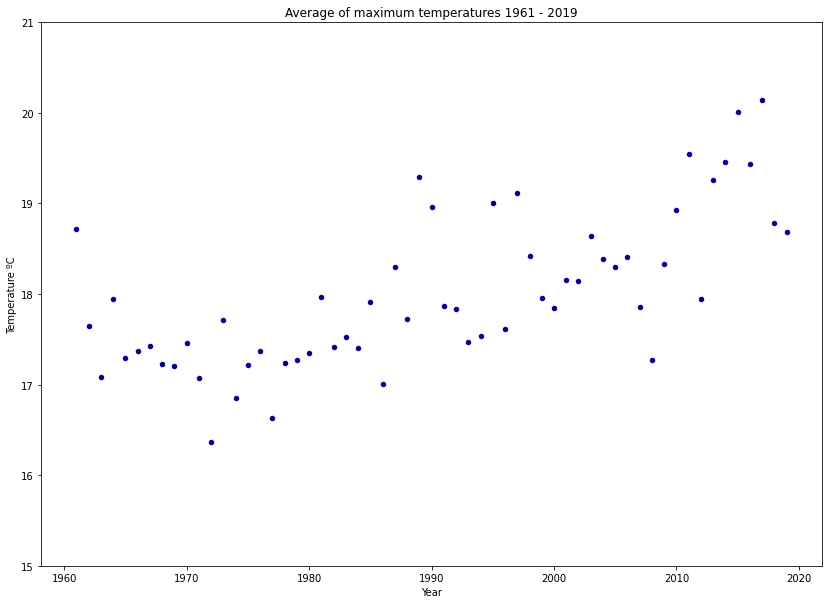

In [126]:
df_tmax.plot(kind='scatter', x='Year', y='Tmax', figsize=(14, 10), color='darkblue')

plt.title('Average of maximum temperatures 1961 - 2019')
plt.xlabel('Year')
plt.ylabel('Temperature ºC')
plt.yticks(range(15,22))

plt.show()

You don't have to be an expert to realize at a glance that values are increasing. Maybe a mean line could helps

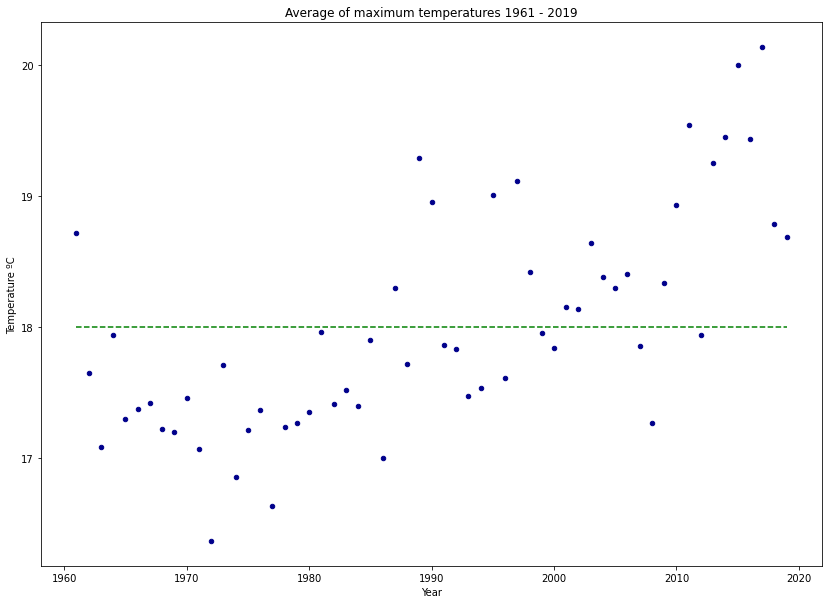

In [127]:
df_tmax.plot(kind='scatter', x='Year', y='Tmax', figsize=(14, 10), color='darkblue')

plt.title('Average of maximum temperatures 1961 - 2019')
plt.xlabel('Year')
plt.ylabel('Temperature ºC')
plt.yticks(range(15,22))
y_mean = [np.mean(df_tmax['Tmax']) for i in df_tmax['Year']]
plt.plot(df_tmax['Year'],y_mean, color='green', linestyle='--')

plt.show()

## 2.2 Minimum temperatures

We can try the same visualization for minimum temperatures. Let's check it

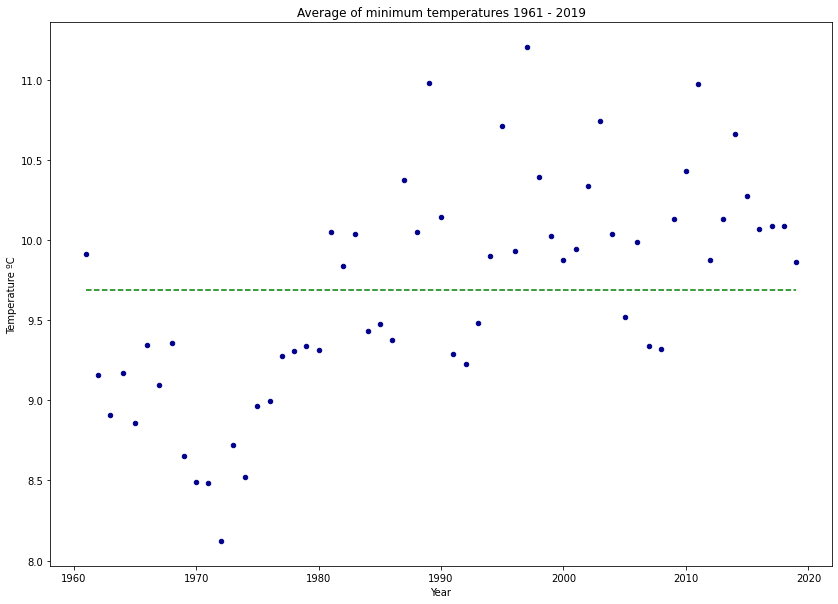

In [128]:
df_tmin = meteo.groupby(['Year'])[['Tmin']].mean()
df_tmin.index = map(int, df_tmin.index)
df_tmin.reset_index(inplace = True)
df_tmin.columns = ['Year', 'Tmin']

df_tmin.plot(kind='scatter', x='Year', y='Tmin', figsize=(14, 10), color='darkblue')

plt.title('Average of minimum temperatures 1961 - 2019')
plt.xlabel('Year')
plt.ylabel('Temperature ºC')
y_mean = [np.mean(df_tmin['Tmin']) for i in df_tmin['Year']]
plt.plot(df_tmin['Year'],y_mean, color='green', linestyle='--')

plt.show()

Yes, the values of the last years are bigger than mean

## 2.3 Rainfalls

What happend with the rainfalls? Let's try to visualize how the values has changed over time

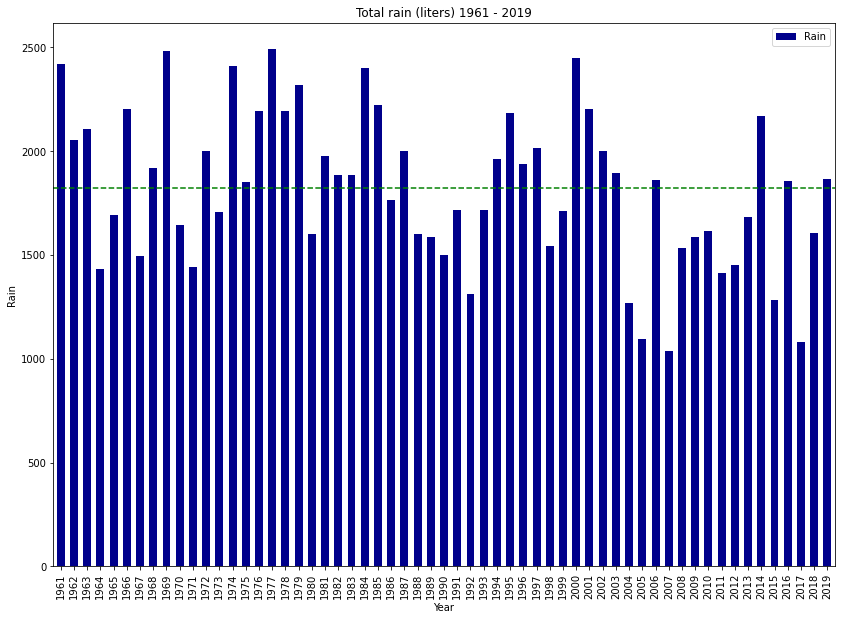

In [129]:
df_rain = meteo.groupby(['Year'])[['Rain']].sum()
df_rain.index = map(int, df_rain.index)
df_rain.reset_index(inplace = True)
df_rain.columns = ['Year', 'Rain']

df_rain.plot(kind='bar', x='Year', y='Rain', figsize=(14, 10), color='darkblue', width=0.6)

plt.title('Total rain (liters) 1961 - 2019')
plt.xlabel('Year')
plt.ylabel('Rain')
plt.axhline(df_rain['Rain'].mean(), color='green', linestyle='--')

plt.show()

The values seem to be lower than mean in last years, but it's more difficult to visualize. In next chapters, we will analyze it in detail.

## 2.4 1962 vs 2019: The first vs the last

How is a winter in Vigo? Let's check it visualizating 2019 values

In [130]:
# Filter values from winter 2019
df_w2019 = meteo[['Tmax']].loc[(meteo['Year'] == 2019) & (meteo['Season'] == 'Winter')]
# Round values and convert into integer
df_w2019['Tmax'] = round(df_w2019['Tmax'],0)
df_w2019 = df_w2019.astype({'Tmax':int})
# Count values
df_w2019 = df_w2019.groupby(['Tmax'])[['Tmax']].count()
# Change the dataframe to a better format
df_w2019.index = map(int, df_w2019.index)
df_w2019.reset_index(inplace = True)
df_w2019.columns = ['Tmax','Count']
# Extend the temperature values from 0 to 25
temp, count = [], []
for i in range(0,26):
    temp.append(i)
    if not df_w2019['Tmax'].loc[(df_w2019['Tmax'] == i).sum()] == 0:
        count.append(df_w2019['Count'].loc[(df_w2019['Tmax'] == i)].sum())
    else:
        count.append(0)
df_w2019 = pd.DataFrame(list(zip(temp,count)), columns=['Tmax','Count'])
df_w2019

,Tmax,Count
0,0,0
1,1,0
2,2,0
3,3,0
4,4,0
5,5,0
6,6,0
7,7,1
8,8,0
9,9,1


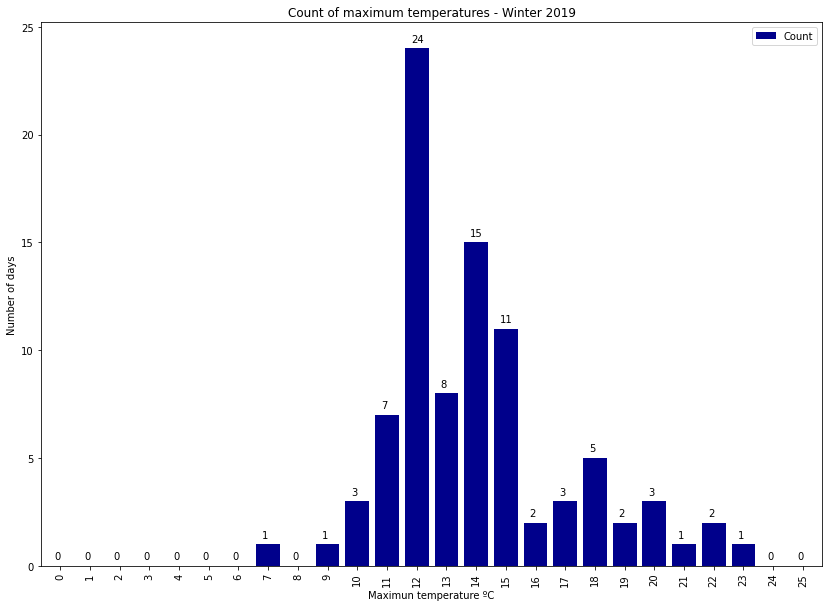

In [131]:
df_w2019.plot(kind='bar', x='Tmax', y='Count', figsize=(14, 10), color='darkblue', width=0.8)

plt.title('Count of maximum temperatures - Winter 2019')
plt.xlabel('Maximun temperature ºC')
plt.ylabel('Number of days')
plt.xticks(range(0,26))
for index,value in enumerate(df_w2019['Count']): 
    # place text at the end of bar
    plt.annotate(value, xy=(index-0.2, value+0.3), color='black')

plt.show()

The most frequent temperature is 12ºC, but most days it's between 12 and 15ºC (this values are 65%). There are only 2 days under 10ºC, so the weather is warm for a winter.

But, was this always like this? We will take a look to 1962, for example.

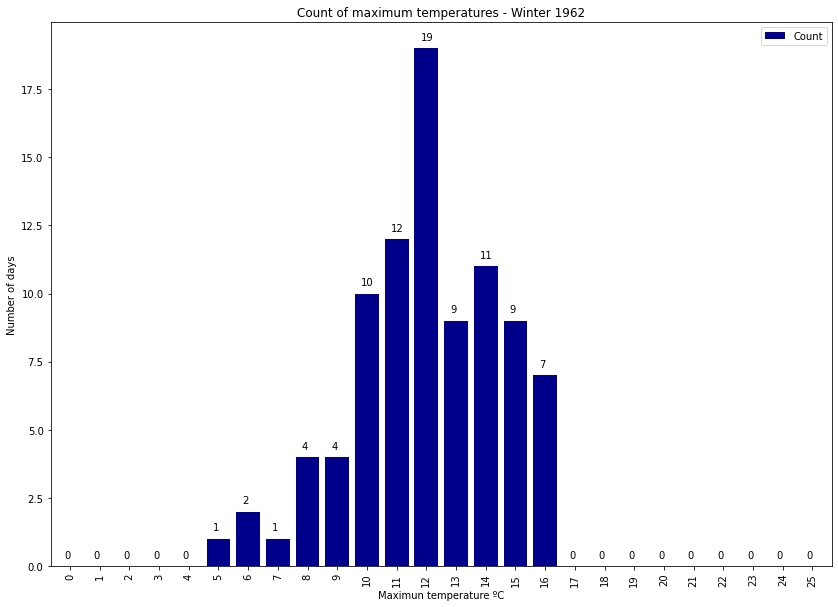

In [132]:
# Filter values from winter 1962
df_w1962 = meteo[['Tmax']].loc[(meteo['Year'] == 1962) & (meteo['Season'] == 'Winter')]
# Round values and convert into integer
df_w1962['Tmax'] = round(df_w1962['Tmax'],0)
df_w1962 = df_w1962.astype({'Tmax':int})
# Count values
df_w1962 = df_w1962.groupby(['Tmax'])[['Tmax']].count()
# Change the dataframe to a better format
df_w1962.index = map(int, df_w1962.index)
df_w1962.reset_index(inplace = True)
df_w1962.columns = ['Tmax','Count']
# Extend the temperature values from 0 to 25
temp, count = [], []
for i in range(0,26):
    temp.append(i)
    if not df_w1962['Tmax'].loc[(df_w1962['Tmax'] == i).sum()] == 0:
        count.append(df_w1962['Count'].loc[(df_w1962['Tmax'] == i)].sum())
    else:
        count.append(0)
df_w1962 = pd.DataFrame(list(zip(temp,count)), columns=['Tmax','Count'])

df_w1962.plot(kind='bar', x='Tmax', y='Count', figsize=(14, 10), color='darkblue', width=0.8)

plt.title('Count of maximum temperatures - Winter 1962')
plt.xlabel('Maximun temperature ºC')
plt.ylabel('Number of days')
plt.xticks(range(0,26))
for index,value in enumerate(df_w1962['Count']): 
    # place text at the end of bar
    plt.annotate(value, xy=(index-0.2, value+0.3), color='black')

plt.show()

The most frequent temperate was 12ºC for 1962 too, and the range 12-15ºC was now the 53%. This values may seem similar to 2019 data, but in 1962 there were 12 days under 10ºC versus 2 days in 2019, and in 1962 there weren't any day over 16ºC versus 17 days in 2019.

We can conclude that in 1962 there were more cold days than 2019, and in 2019 there were more warm days than 1962. The following plot compares both.

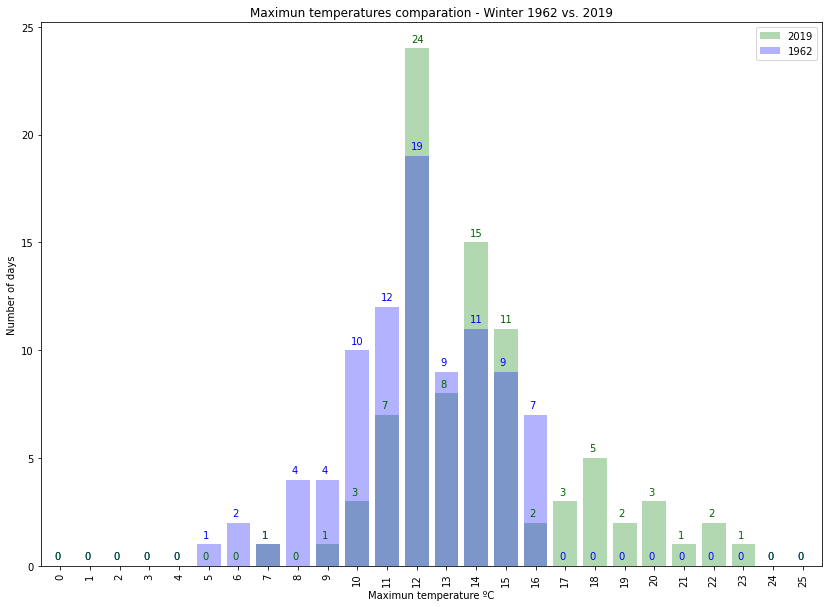

In [133]:
ax = df_w2019.plot(kind='bar', x='Tmax', y='Count', figsize=(14, 10), color='green', width=0.8, alpha=0.3)
df_w1962[['Count']].plot(ax=ax, kind='bar', figsize=(14, 10), color='blue', width=0.8, alpha=0.3 )

ax.legend(['2019','1962'])
plt.title('Maximun temperatures comparation - Winter 1962 vs. 2019')
plt.xlabel('Maximun temperature ºC')
plt.ylabel('Number of days')
plt.xticks(range(0,26))
for index,value in enumerate(df_w1962['Count']): 
    # place text at the end of bar
    plt.annotate(value, xy=(index-0.2, value+0.3), color='blue')
for index,value in enumerate(df_w2019['Count']): 
    plt.annotate(value, xy=(index-0.2, value+0.3), color='darkgreen')

plt.show()

This was the analysis between two concrete years. If we evaluate a bigger period, we should obtain results without significative desviations. So, let's compare de period between 1961 and 1969 versus 2011 and 2019.

## 2.5 Winter: 1960's vs 2010's

For a easiest data manipulation, we will create a function to select our necessary data

In [134]:
def selectVal(df,searched,season,ini,end):
    # Filter values from 1961-1969
    df2 = df[[searched]].loc[(df['Year'] >= ini) & (df['Year'] <= end) & (df['Season'] == season)]
    # Round values and convert into integer
    df2[searched] = round(df2[searched],0)
    df2 = df2.astype({searched:int})
    # Count values
    df2 = df2.groupby([searched])[[searched]].count()
    # Change the dataframe to a better format
    df2.index = map(int, df2.index)
    df2.reset_index(inplace = True)
    df2.columns = [searched,'Count']
    # Extend the temperature values 
    temp, count = [], []
    for i in range(0,50):
        temp.append(i-5)
        if not df2['Count'].loc[(df2[searched] == i-5)].sum() == 0:
            count.append(df2['Count'].loc[(df2[searched] == i-5)].sum())
        else:
            count.append(0)
    df2 = pd.DataFrame(list(zip(temp,count)), columns=[searched,'Count'])
    
    return df2

Let's select both periods and compare them

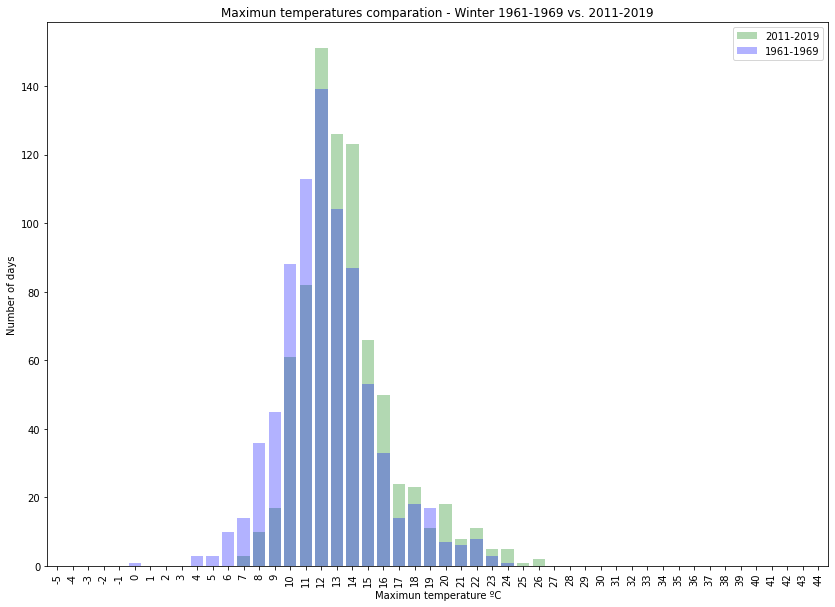

In [135]:
df_w1960 = selectVal(meteo,'Tmax','Winter',1961,1969)
df_w2010 = selectVal(meteo,'Tmax','Winter',2011,2019)

# To plot de bar char
ax = df_w2010.plot(kind='bar', x='Tmax', y='Count', figsize=(14, 10), color='green', width=0.8, alpha=0.3)
df_w1960.plot(ax=ax, kind='bar', x='Tmax', y='Count', figsize=(14, 10), color='blue', width=0.8, alpha=0.3 )

ax.legend(['2011-2019','1961-1969'])
plt.title('Maximun temperatures comparation - Winter 1961-1969 vs. 2011-2019')
plt.xlabel('Maximun temperature ºC')
plt.ylabel('Number of days')

plt.show()

Taking 12ºC as reference, we can conclude that in the range between 1961 and 1969 there were more cold days, and between 2011 and 2019 there were more warm days.

Let's try the same compatarion, but this time using minimum temperatures.

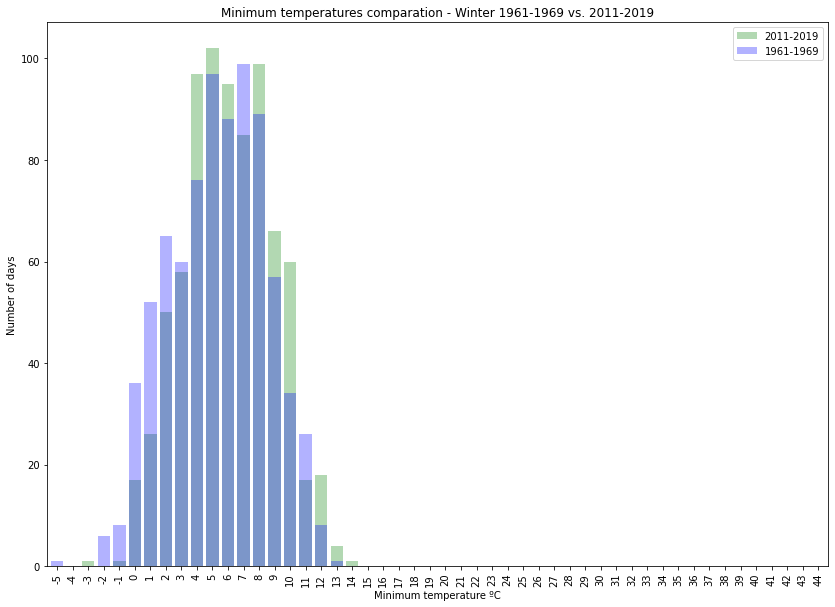

In [136]:
df_w1960 = selectVal(meteo,'Tmin','Winter',1961,1969)
df_w2010 = selectVal(meteo,'Tmin','Winter',2011,2019)

# To plot de bar char
ax = df_w2010.plot(kind='bar', x='Tmin', y='Count', figsize=(14, 10), color='green', width=0.8, alpha=0.3)
df_w1960.plot(ax=ax, kind='bar',x='Tmin', y='Count', figsize=(14, 10), color='blue', width=0.8, alpha=0.3)

ax.legend(['2011-2019','1961-1969'])
plt.title('Minimum temperatures comparation - Winter 1961-1969 vs. 2011-2019')
plt.xlabel('Minimum temperature ºC')
plt.ylabel('Number of days')

plt.show()

Temperatures lower than 4ºC were more frequent in 1961-1969, while bigger than 7ºC were in the range 2011-2019 

## 2.6 Spring: 1960's vs 2010's

Let's repeat the same process to maximum temperatures in spring

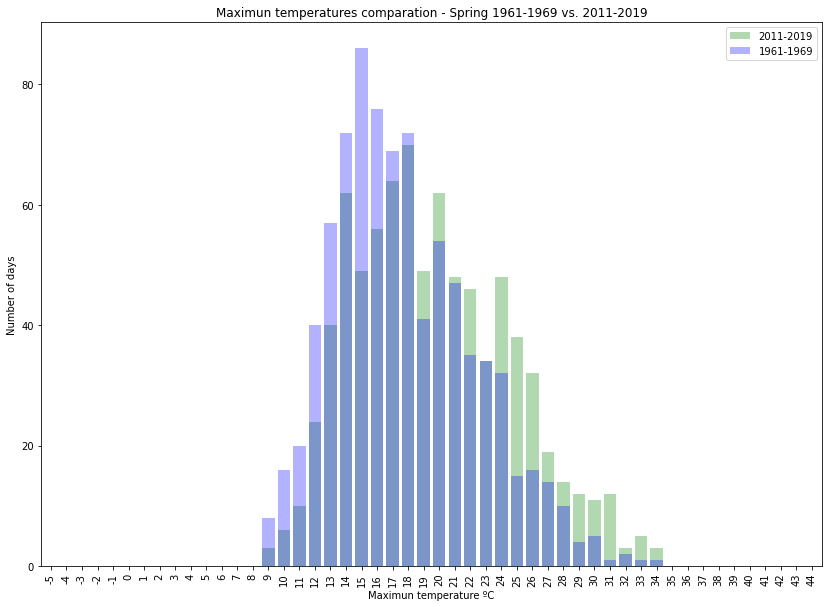

In [137]:
df_sp1960 = selectVal(meteo,'Tmax','Spring',1961,1969)
df_sp2010 = selectVal(meteo,'Tmax','Spring',2011,2019)

# To plot de bar char
ax = df_sp2010.plot(kind='bar', x='Tmax', y='Count', figsize=(14, 10), color='green', width=0.8, alpha=0.3)
df_sp1960.plot(ax=ax, kind='bar', x='Tmax', y='Count', figsize=(14, 10), color='blue', width=0.8, alpha=0.3)

ax.legend(['2011-2019','1961-1969'])
plt.title('Maximun temperatures comparation - Spring 1961-1969 vs. 2011-2019')
plt.xlabel('Maximun temperature ºC')
plt.ylabel('Number of days')

plt.show()

The same pattern is repeated. The lowest temperatures correspond to 50 years ago, while the warmest values in recent years. Note that the most frequent maximum temperature was 15ºC for 1960's, and for the 2010's was three degrees bigger, 18ºC.

What about the maximum spring temperatures?

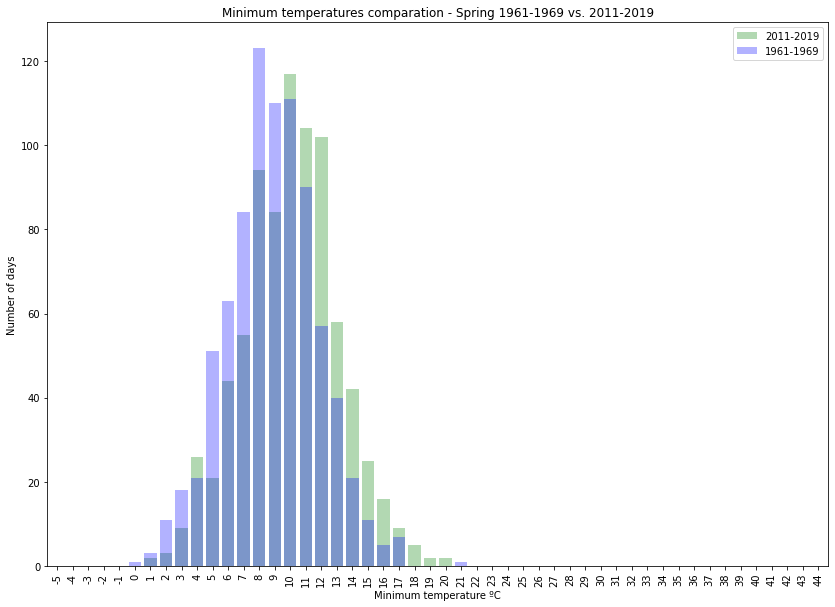

In [138]:
df_sp1960 = selectVal(meteo,'Tmin','Spring',1961,1969)
df_sp2010 = selectVal(meteo,'Tmin','Spring',2011,2019)

# To plot de bar char
ax = df_sp2010.plot(kind='bar', x='Tmin', y='Count', figsize=(14, 10), color='green', width=0.8, alpha=0.3)
df_sp1960.plot(ax=ax, kind='bar', x='Tmin', y='Count', figsize=(14, 10), color='blue', width=0.8, alpha=0.3)

ax.legend(['2011-2019','1961-1969'])
plt.title('Minimum temperatures comparation - Spring 1961-1969 vs. 2011-2019')
plt.xlabel('Minimum temperature ºC')
plt.ylabel('Number of days')

plt.show()

Everything as we expected. The most frequente minimum temperature increase 2 degrees.

## 2.7 Summer: 1960's vs 2010's

The maximum temperatures first

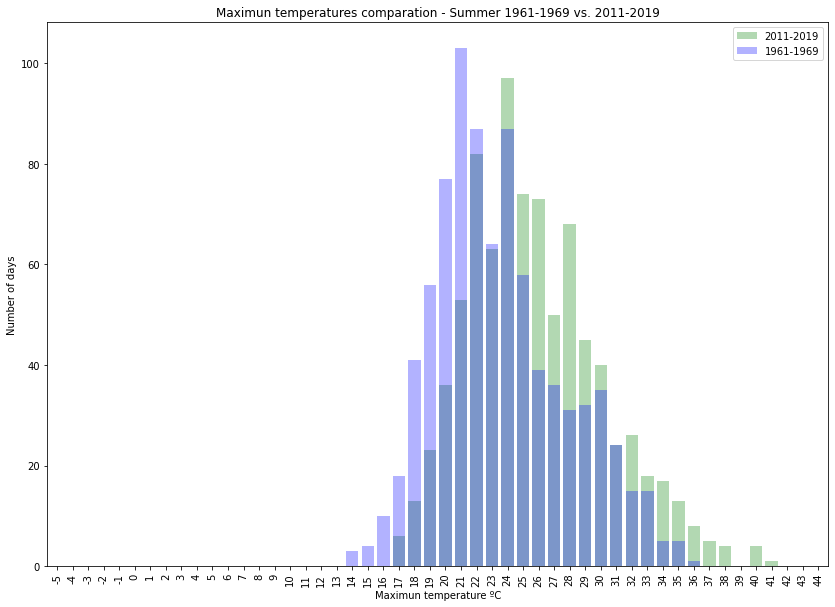

In [139]:
df_s1960 = selectVal(meteo,'Tmax','Summer',1961,1969)
df_s2010 = selectVal(meteo,'Tmax','Summer',2011,2019)

# To plot de bar char
ax = df_s2010.plot(kind='bar', x='Tmax', y='Count', figsize=(14, 10), color='green', width=0.8, alpha=0.3)
df_s1960.plot(ax=ax, kind='bar', x='Tmax', y='Count', figsize=(14, 10), color='blue', width=0.8, alpha=0.3)

ax.legend(['2011-2019','1961-1969'])
plt.title('Maximun temperatures comparation - Summer 1961-1969 vs. 2011-2019')
plt.xlabel('Maximun temperature ºC')
plt.ylabel('Number of days')

plt.show()

Like spring values, the most frequent maximum temperature increase in three degrees, from 21ºC to 24ºC. 

Will the minimum values variation change in 2 degrees too?

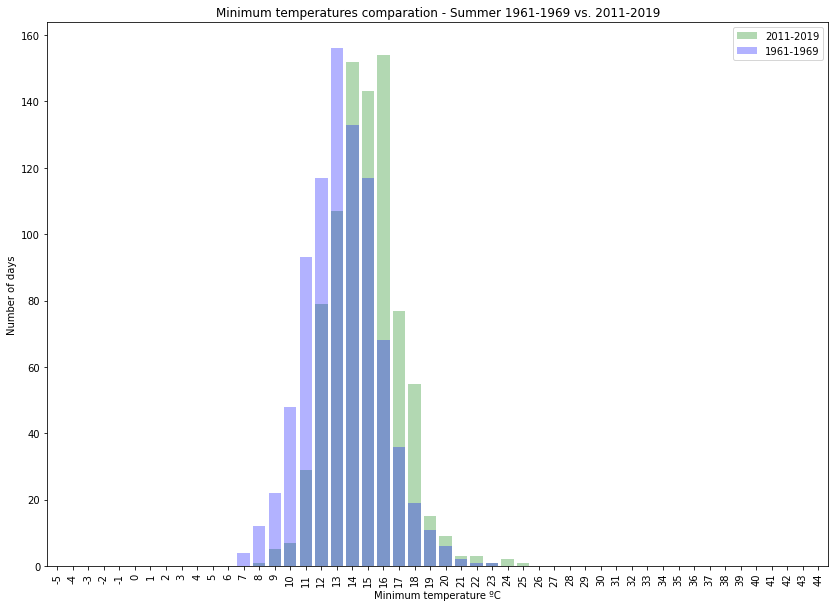

In [140]:
df_s1960 = selectVal(meteo,'Tmin','Summer',1961,1969)
df_s2010 = selectVal(meteo,'Tmin','Summer',2011,2019)

# To plot de bar char
ax = df_s2010.plot(kind='bar', x='Tmin', y='Count', figsize=(14, 10), color='green', width=0.8, alpha=0.3)
df_s1960.plot(ax=ax, kind='bar', x='Tmin', y='Count', figsize=(14, 10), color='blue', width=0.8, alpha=0.3)

ax.legend(['2011-2019','1961-1969'])
plt.title('Minimum temperatures comparation - Summer 1961-1969 vs. 2011-2019')
plt.xlabel('Minimum temperature ºC')
plt.ylabel('Number of days')

plt.show()

No, the difference is even bigger with 3 degrees variaton, from 13ºC to 16ºC

## 2.8 Autumn: 1960's vs 2010's

Let's check the maximum temperatures for the last season

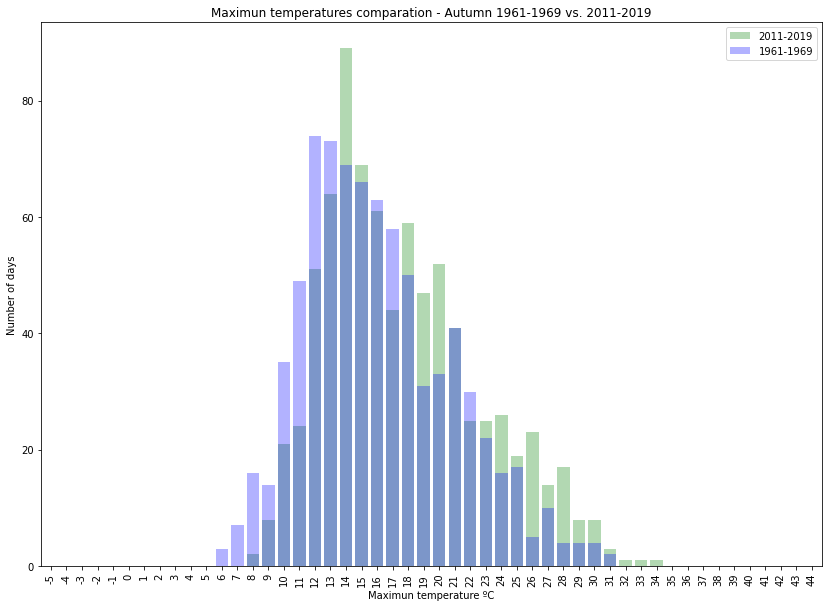

In [141]:
df_a1960 = selectVal(meteo,'Tmax','Autumn',1961,1969)
df_a2010 = selectVal(meteo,'Tmax','Autumn',2011,2019)

# To plot de bar char
ax = df_a2010.plot(kind='bar', x='Tmax', y='Count', figsize=(14, 10), color='green', width=0.8, alpha=0.3)
df_a1960.plot(ax=ax, kind='bar', x='Tmax', y='Count', figsize=(14, 10), color='blue', width=0.8, alpha=0.3)

ax.legend(['2011-2019','1961-1969'])
plt.title('Maximun temperatures comparation - Autumn 1961-1969 vs. 2011-2019')
plt.xlabel('Maximun temperature ºC')
plt.ylabel('Number of days')

plt.show()

The increase in the most frequent value is 2 degrees for this season, growing from 12 to 14ºC. 

Let's review the minimum temperatures

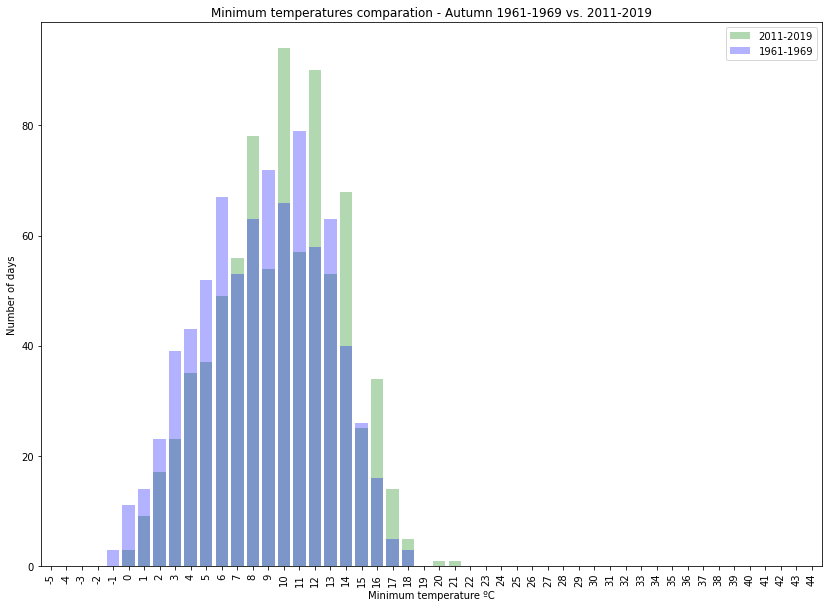

In [142]:
df_a1960 = selectVal(meteo,'Tmin','Autumn',1961,1969)
df_a2010 = selectVal(meteo,'Tmin','Autumn',2011,2019)

# To plot de bar char
ax = df_a2010.plot(kind='bar', x='Tmin', y='Count', figsize=(14, 10), color='green', width=0.8, alpha=0.3)
df_a1960.plot(ax=ax, kind='bar', x='Tmin', y='Count', figsize=(14, 10), color='blue', width=0.8, alpha=0.3)

ax.legend(['2011-2019','1961-1969'])
plt.title('Minimum temperatures comparation - Autumn 1961-1969 vs. 2011-2019')
plt.xlabel('Minimum temperature ºC')
plt.ylabel('Number of days')

plt.show()

The most frequent minimum temperature is one degree lower in the last decade, but the bigger values were again in 2010's and lower in 1960's

## 2.9 Rainfalls: 1960's vs 2010's

What about rainfalls? We will compare both periods too, but we will use a different plot, showing the mean rain per year for each season.

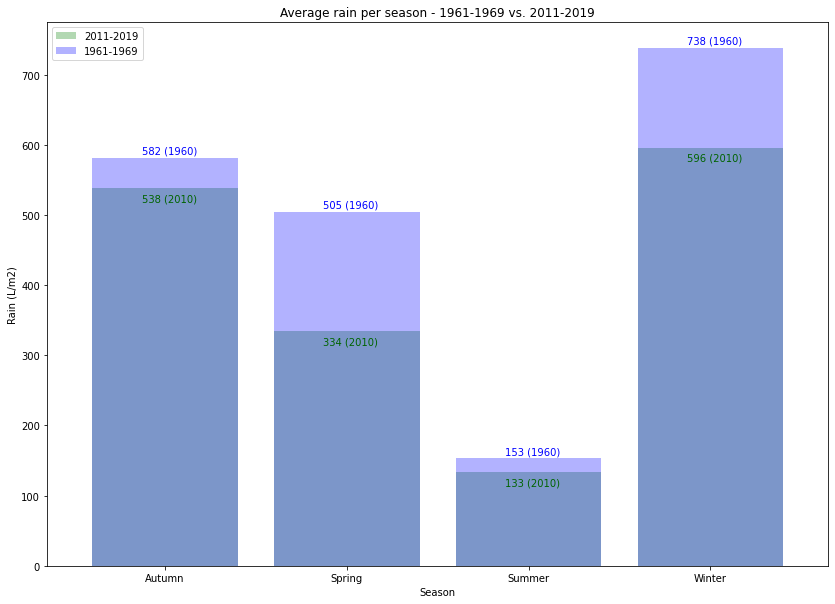

In [143]:
rain1960 = meteo.loc[(meteo['Year'] >= 1961) & (meteo['Year'] <= 1969)]
rain1960 = rain1960.groupby(['Year','Season'])[['Rain']].sum()
rain1960 = rain1960.groupby(['Season'])[['Rain']].mean()
rain1960['Rain'] = round(rain1960['Rain'],0)
rain1960 = rain1960.astype({'Rain':int})
rain1960.reset_index(inplace = True)
rain1960.columns = ['Season','Rain']

rain2010 = meteo.loc[(meteo['Year'] >= 2011) & (meteo['Year'] <= 2019)]
rain2010 = rain2010.groupby(['Year','Season'])[['Rain']].sum()
rain2010 = rain2010.groupby(['Season'])[['Rain']].mean()
rain2010['Rain'] = round(rain2010['Rain'],0)
rain2010 = rain2010.astype({'Rain':int})
rain2010.reset_index(inplace = True)
rain2010.columns = ['Season','Rain']

# To plot de bar char
ax = rain2010.plot(kind='bar', y='Rain', figsize=(14, 10), color='green', width=0.8, alpha=0.3, rot=0)
rain1960.plot(ax=ax, kind='bar', y='Rain', figsize=(14, 10), color='blue', width=0.8, alpha=0.3, rot=0)

ax.legend(['2011-2019','1961-1969'])
plt.title('Average rain per season - 1961-1969 vs. 2011-2019')
plt.xlabel('Season')
plt.xticks(np.array([0,1,2,3]),['Autumn','Spring','Summer','Winter'])
plt.ylabel('Rain (L/m2)')
for index,value in enumerate(rain1960['Rain']): 
    plt.annotate((str(value)+' (1960)'), xy=(index-0.13, value+6), color='blue')
for index,value in enumerate(rain2010['Rain']): 
    plt.annotate((str(value)+' (2010)'), xy=(index-0.13, value-18), color='darkgreen')

plt.show()

There are 2 very different situations. On the one hand, autumn and summer suffer a slight decrease (7,5% and 13% respectively), while the drop in rainfall in spring and winter is much more pronounced (33,8% and 19,2% respectively).

# 3. Predictions

Until now we have been reviewing the values since 1961, but what will happen in the future? Can we predict it?

We cannot guess the future, but we can estimate what the expected values will be. To do this, we will use linear regression, and in order to simplify the results we will not work with seasons, focusing only on the annual values temperatures and rain.

## 3.1 Maximum temperatures

Let's star plotting our maximum temperatures values and plotting the fit line (red line). We will create an easy function to calculte our predicted values

Text(0, 0.5, 'Temperature ºC')

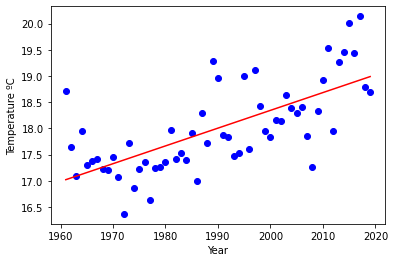

In [144]:
regr = linear_model.LinearRegression()
x = np.asanyarray(df_tmax[['Year']])
y = np.asanyarray(df_tmax[['Tmax']])
regr.fit(x, y)

def TmaxPredict(x):
    y = regr.coef_[0][0]*x + regr.intercept_[0]
    return y

plt.scatter(df_tmax['Year'], df_tmax['Tmax'],  color='blue')
plt.plot(x, TmaxPredict(x), '-r')
plt.xlabel("Year")
plt.ylabel("Temperature ºC")

We are ready to predict the maximum temperatures. So, what will be the mean of the maximum temperatures in Vigo in 5 years? Let's calculate some years more

In [145]:
year, tmax = [], []
for i in range(0,27):
    val = 2020+(i*5)
    year.append(val)
    tmax.append(TmaxPredict(val))
fut_tmax = pd.DataFrame(list(zip(year,tmax)), columns=['Year','Tmax'])
fut_tmax

,Year,Tmax
0,2020,19.023233
1,2025,19.192896
2,2030,19.362560
3,2035,19.532223
4,2040,19.701887
5,2045,19.871550
6,2050,20.041214
7,2055,20.210877
8,2060,20.380541
9,2065,20.550204


We will try to assimilate the results. Remember that until 1990, the maximum annual temperature did not even reach 18ºC on average. If we go to 10 years from now, 2030, the average temperature will be 19,36ºC. If we move to 2050 (it's not that far, I'll be 66 years old!), the value will be 20ºC. This is 2 degrees more than I was born.

What will happen to a person born in 2020? In 2100 he will be 80 years old, many of them will reach this age, and by then the temperature will be 21.7ºC. In 2150 the temperature will be 23,43ºC, and the grandchildren of our grandchildren will live it.


## 3.2 Minimum temperatures

We will repeat the same process for minimum temperatures, of course.

Text(0, 0.5, 'Temperature ºC')

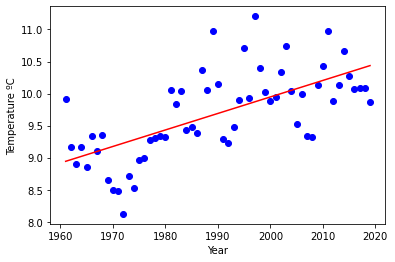

In [146]:
from sklearn import linear_model
regr = linear_model.LinearRegression()
x = np.asanyarray(df_tmin[['Year']])
y = np.asanyarray(df_tmin[['Tmin']])
regr.fit(x, y)

def TminPredict(x):
    y = regr.coef_[0][0]*x + regr.intercept_[0]
    return y

plt.scatter(df_tmin['Year'], df_tmin['Tmin'],  color='blue')
plt.plot(x, TminPredict(x), '-r')
plt.xlabel("Year")
plt.ylabel("Temperature ºC")

In [147]:
year, tmin = [], []
for i in range(0,27):
    val = 2020+(i*5)
    year.append(val)
    tmin.append(TminPredict(val))
fut_tmin = pd.DataFrame(list(zip(year,tmin)), columns=['Year','Tmin'])
fut_tmin

,Year,Tmin
0,2020,10.462259
1,2025,10.591040
2,2030,10.719821
3,2035,10.848603
4,2040,10.977384
5,2045,11.106165
6,2050,11.234946
7,2055,11.363727
8,2060,11.492508
9,2065,11.621289


The situation is the same for minimum temperatures. With values lower than 10ºC until 1980, the predicted values achive 12,5ºC for the year 2100.

## 3.3 Rainfalls

And finally, what about rainfalls? The decrease in rain was not as pronounced as the rise in temperatures, so let's check the predicted values for the next years

Text(0, 0.5, 'Rain')

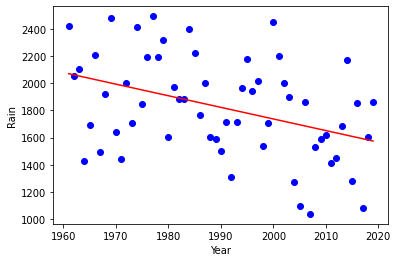

In [148]:
from sklearn import linear_model
regr = linear_model.LinearRegression()
x = np.asanyarray(df_rain[['Year']])
y = np.asanyarray(df_rain[['Rain']])
regr.fit(x, y)

def RainPredict(x):
    y = regr.coef_[0][0]*x + regr.intercept_[0]
    return y

plt.scatter(df_rain['Year'], df_rain['Rain'],  color='blue')
plt.plot(x, RainPredict(x), '-r')
plt.xlabel("Year")
plt.ylabel("Rain")

In [149]:
year, rain = [], []
for i in range(0,27):
    val = 2020+(i*5)
    year.append(val)
    rain.append(RainPredict(val))
fut_rain = pd.DataFrame(list(zip(year,rain)), columns=['Year','Rain'])
fut_rain = fut_rain.astype({'Rain':int})
fut_rain

,Year,Rain
0,2020,1566
1,2025,1523
2,2030,1480
3,2035,1438
4,2040,1395
5,2045,1352
6,2050,1309
7,2055,1267
8,2060,1224
9,2065,1181


We were wrong. Visually, from the graph at the beginning of the study, it seemed that the trend was not as sharp. However, plotting the trend line given by the regression, already makes us predict a significant decrease in rainfall.

In 100 years (from 2020 to 2120), rainfalls will be cut in half. Until 2000, the total rainfalls was frequently bigger than 2.000 liters, value cut in a half for 2085. 

# 4. Conclusions

No one is going to discover climate change at this point. This is a fact and denialism is a clear realism problem. Any politician, institution or company can reach this conclusion only by comparing the climate when we were child. Analysis like this only puts numbers to the problem.

With actual values, predictions says that in the next 100 years the temperatures will increase in 3ºC and the rainfalls will be cut in a half. It's a huge climate change in few time. For Vigo's example, the climate will change to another type more close to Barcelona or Valencia, with everything it means for the flora and fauna of the area, in addition to the repercussion on the inhabitants and resources of the area.

Will these be the final values? I hope not. Governments, companies and individuals have begun to adopt changes to reverse this situation. The results will not have immediate effect, but the red line that we plotted in the linear regression graphs  will change towards a minor slope, and even other models like polynomial regression could fit better to future values.